In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data = pd.read_csv('/content/insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Data Analysis

<ipython-input-7-6f961353f402>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


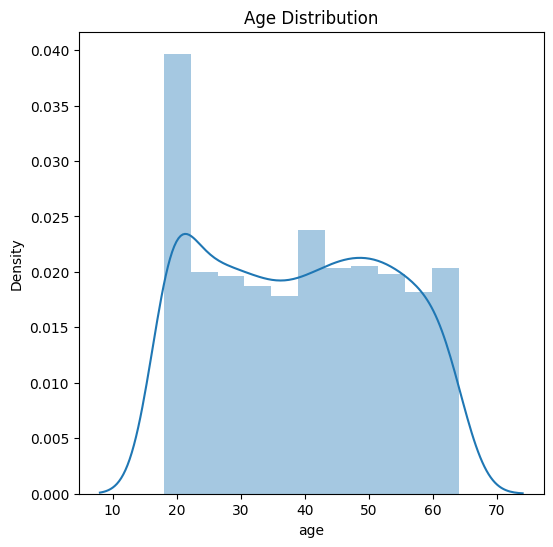

In [7]:
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

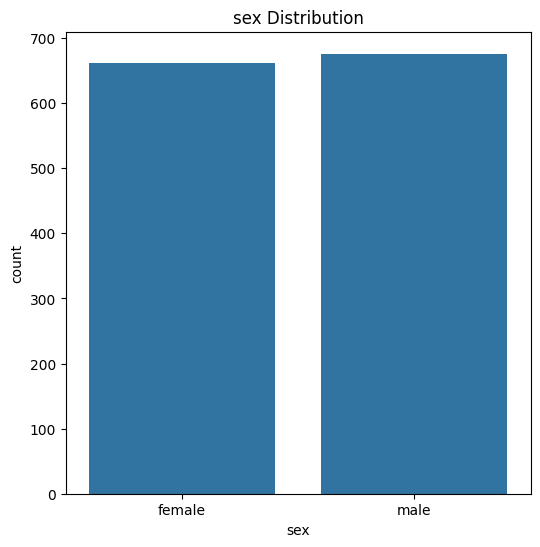

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x ='sex', data = data)
plt.title('sex Distribution')
plt.show()

In [13]:
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<ipython-input-14-111a2242a6ca>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


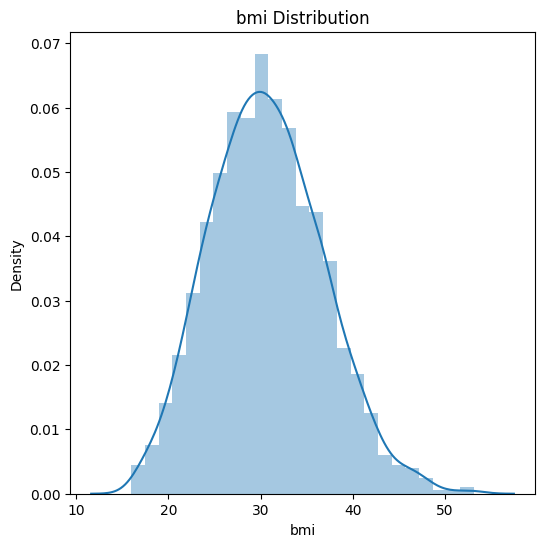

In [14]:
plt.figure(figsize=(6,6))
sns.distplot(data['bmi'])
plt.title('bmi Distribution')
plt.show()

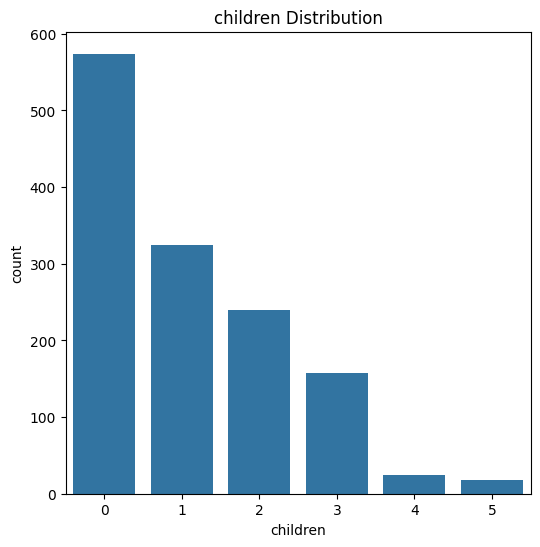

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x ='children', data = data)
plt.title('children Distribution')
plt.show()

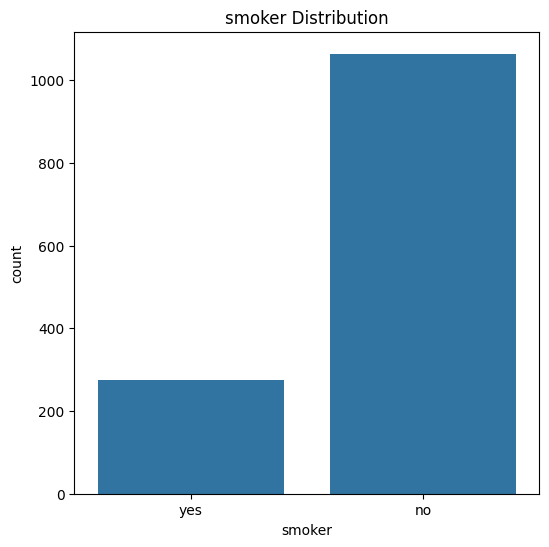

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x ='smoker', data = data)
plt.title('smoker Distribution')
plt.show()

<ipython-input-17-27cebf059186>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


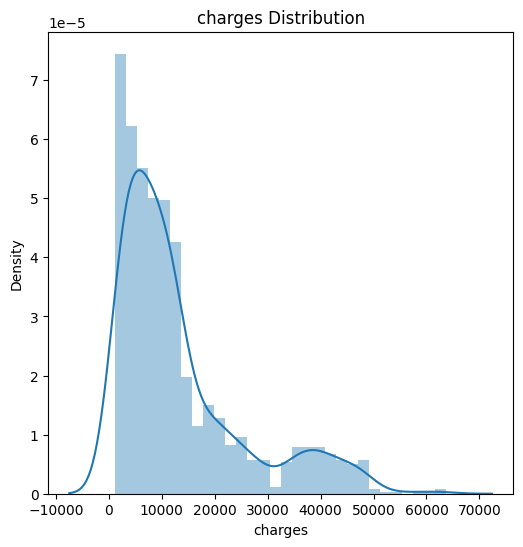

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(data['charges'])
plt.title('charges Distribution')
plt.show()

Data Preprocessing

In [18]:
# encoding the categorical columns

data.replace({'sex': {'male':0, 'female':1}}, inplace = True)
data.replace({'smoker': {'yes':0, 'no':1}}, inplace = True)
data.replace({'region': {'southeast':0, 'southwest':1, 'northeast':2, 'northwest': 3}}, inplace = True)


In [19]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Splitting the features and the target

In [20]:
X = data.drop(['charges'], axis=1)
Y = data['charges']

In [21]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [22]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Splitting the data into training and testing data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state =2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training:  Linear Regression

In [25]:
model = LinearRegression()

In [27]:
model.fit(X_train, Y_train)

LinearRegression()

Evaluation of model

In [28]:
#prediction on training data

training_data_predict = model.predict(X_train)

In [29]:
# R squared value

R2_train = metrics.r2_score(Y_train, training_data_predict)
print('R squared value : ', R2_train)

R squared value :  0.751505643411174


In [30]:
#prediction on testing data

testing_data_predict = model.predict(X_test)

In [31]:
# R squared value

R2_test = metrics.r2_score(Y_test, testing_data_predict)
print('R squared value : ', R2_test)

R squared value :  0.7447273869684076


Building a predictive system

In [32]:
input_data = (31,1,25.74,0,1,0)

# changing input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
prediction = model.predict(input_data_reshaped)
prediction[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3760.080576496057